In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer



# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Load training data
df = pd.read_csv("/content/training_data_lowercase.csv", sep="\t", header=None, names=['label','title'], encoding='utf-8', engine='python')

# Display shape and head
print(df.shape)
print(df.head())


(34152, 2)
   label                                              title
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


In [4]:
def preprocess_text(text):
    # --- Clean hidden or unwanted characters ---
    if not isinstance(text, str):
        text = str(text)
    text = text.replace('\ufeff', '')        # Remove BOM characters
    text = text.strip()                      # Remove leading/trailing spaces
    text = re.sub(r'\s+', ' ', text)         # Normalize multiple spaces

    # --- Tokenization ---
    tokens = word_tokenize(text.lower())

    # --- Remove stopwords ---
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]

    # --- Remove punctuation and numbers ---
    tokens = [re.sub(r'[^a-zA-Z]', '', t) for t in tokens]
    tokens = [t for t in tokens if t]  # Remove empty strings

    # --- Lemmatization ---
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # --- Stemming ---
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]

    return ' '.join(tokens)

In [5]:
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
# Apply preprocessing
df['Processed_Text'] = df['title'].apply(preprocess_text)

In [7]:
X = df['Processed_Text']
y = df['label'].astype(int)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/854 [00:00<?, ?it/s]

Batches:   0%|          | 0/214 [00:00<?, ?it/s]

Embedding shape: (27321, 384)
Model 5 (Sentence Embeddings + Logistic Regression)
Train Accuracy: 0.8818
Validation Accuracy: 0.8741

Classification Report:
              precision    recall  f1-score      support
0              0.882455  0.871408  0.876897  3515.000000
1              0.865476  0.876960  0.871180  3316.000000
accuracy       0.874103  0.874103  0.874103     0.874103
macro avg      0.873965  0.874184  0.874038  6831.000000
weighted avg   0.874213  0.874103  0.874122  6831.000000


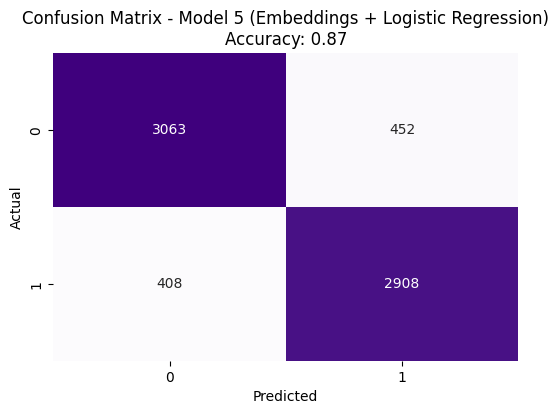

/tmp/ipython-input-557020963.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df_m5.index[:-3], y=report_df_m5['f1-score'][:-3], palette='mako')


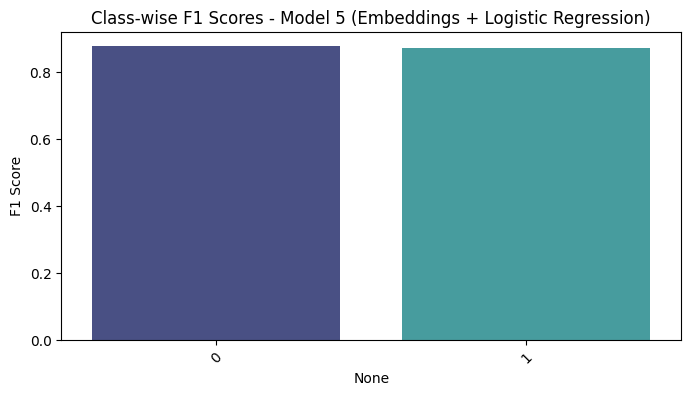

In [ ]:
#model 5 - Embeddings


# Load a pretrained embedding model
# (You can use 'all-MiniLM-L6-v2' for lightweight, high-quality sentence embeddings)
embedder = SentenceTransformer('all-MiniLM-L6-v2')
# Generate embeddings for training and validation data
X_train_emb = embedder.encode(X_train.tolist(), show_progress_bar=True)
X_val_emb = embedder.encode(X_val.tolist(), show_progress_bar=True)
print("Embedding shape:", X_train_emb.shape)
# Train a simple classifier on top of embeddings
clf_m5 = LogisticRegression(max_iter=200, random_state=42)
clf_m5.fit(X_train_emb, y_train)
# Predict and evaluate
pred_train_m5 = clf_m5.predict(X_train_emb)
pred_val_m5 = clf_m5.predict(X_val_emb)
# --- Accuracy ---
train_acc_m5 = accuracy_score(y_train, pred_train_m5)
val_acc_m5 = accuracy_score(y_val, pred_val_m5)
print(f"Model 5 (Sentence Embeddings + Logistic Regression)")
print(f"Train Accuracy: {train_acc_m5:.4f}")
print(f"Validation Accuracy: {val_acc_m5:.4f}")
# --- Classification Report ---
report_m5 = classification_report(y_val, pred_val_m5, output_dict=True)
report_df_m5 = pd.DataFrame(report_m5).transpose()
print("\nClassification Report:")
print(report_df_m5)
# --- Confusion Matrix ---
cm_m5 = confusion_matrix(y_val, pred_val_m5)
plt.figure(figsize=(6,4))
sns.heatmap(cm_m5, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix - Model 5 (Embeddings + Logistic Regression)\nAccuracy: {val_acc_m5:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# --- F1 Score Plot ---
plt.figure(figsize=(8,4))
sns.barplot(x=report_df_m5.index[:-3], y=report_df_m5['f1-score'][:-3], palette='mako')
plt.title('Class-wise F1 Scores - Model 5 (Embeddings + Logistic Regression)')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()